# This notebook tackles one of the tasks in the Programming section: finding the Hardness!

In [7]:
using GenericTensorNetworks
using BloqadeMIS
using Bloqade

In [8]:
function get_hardness(G)
    problem = IndependentSet(G; optimizer=TreeSA())
    MIS = GenericTensorNetworks.solve(problem, SizeMax())[].n
    Dmax = GenericTensorNetworks.solve(problem, CountingMax(2))[].coeffs[2]
    Dsecond = GenericTensorNetworks.solve(problem, CountingMax(2))[].coeffs[1]
    hp = (Dsecond / (MIS * Dmax))
    return hp
end

get_hardness (generic function with 1 method)

# Example

### trying for a Rb/a ~ 3 graph with 5x5 grid

In [6]:
atoms = AtomList([(0.0, 0.0), (0.0, 4.5), (0.0, 9.0), (0.0, 13.5), (0.0, 18.0), (4.5, 0.0),  
     (4.5, 13.5), (4.5, 18.0), (9.0, 0.0), (9.0, 9.0), (9.0, 13.5), (9.0, 18.0),
    (13.5, 0.0), (13.5, 4.5), (13.5, 9.0), (13.5, 13.5), (13.5, 18.0), (18.0, 0.0),
    (18.0, 13.5), (18.0, 18.0)]);

In [9]:
a = 4.5
Rb = sqrt(3*sqrt(10))*a

13.860316297084605

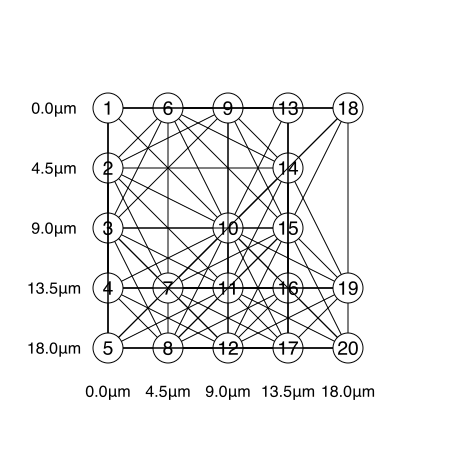

In [9]:
Bloqade.plot(atoms, blockade_radius = Rb)

In [10]:
graph = BloqadeMIS.unit_disk_graph(atoms, Rb)

{20, 111} undirected simple Int64 graph

In [11]:
get_hardness(graph)

3.25

### Checking with same arrangement, but Rb/a = sqrt(2*sqrt(2))

In [12]:
a = 4.5
Rb = sqrt(2*sqrt(2))*a

7.568067737283432

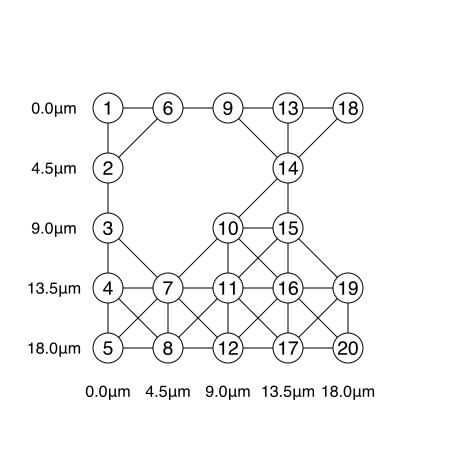

In [13]:
Bloqade.plot(atoms, blockade_radius = Rb)

In [14]:
graph = BloqadeMIS.unit_disk_graph(atoms, Rb)

{20, 42} undirected simple Int64 graph

In [15]:
get_hardness(graph)

2.0416666666666665

# Trying to find harder graphs

In [16]:
using Random
Random.seed!(2)

TaskLocalRNG()

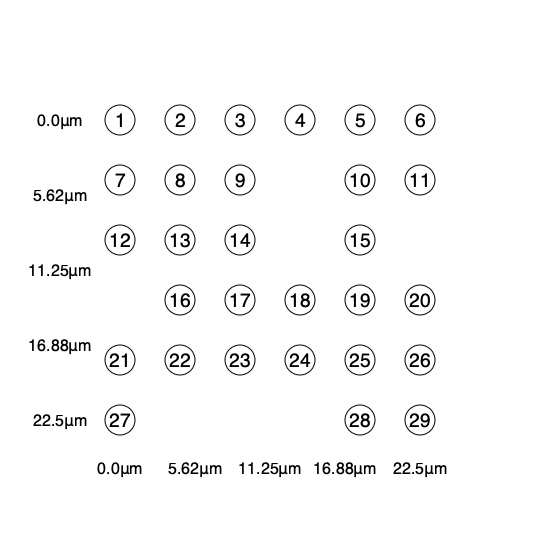

In [22]:
atoms = generate_sites(SquareLattice(), 6,6; scale = a) |> random_dropout(0.2)

In [23]:
Rb=sqrt(3*sqrt(5))*a

11.65509028850108

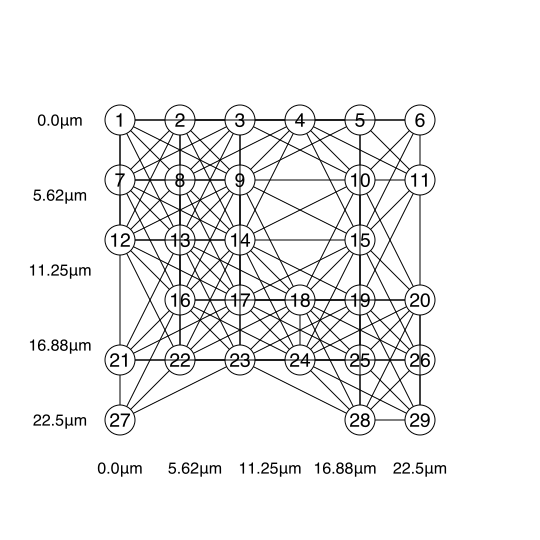

In [24]:
Bloqade.plot(atoms, blockade_radius = Rb)

In [25]:
graph = BloqadeMIS.unit_disk_graph(atoms, Rb)
get_hardness(graph)

12.166666666666666

# Let's go even harder!

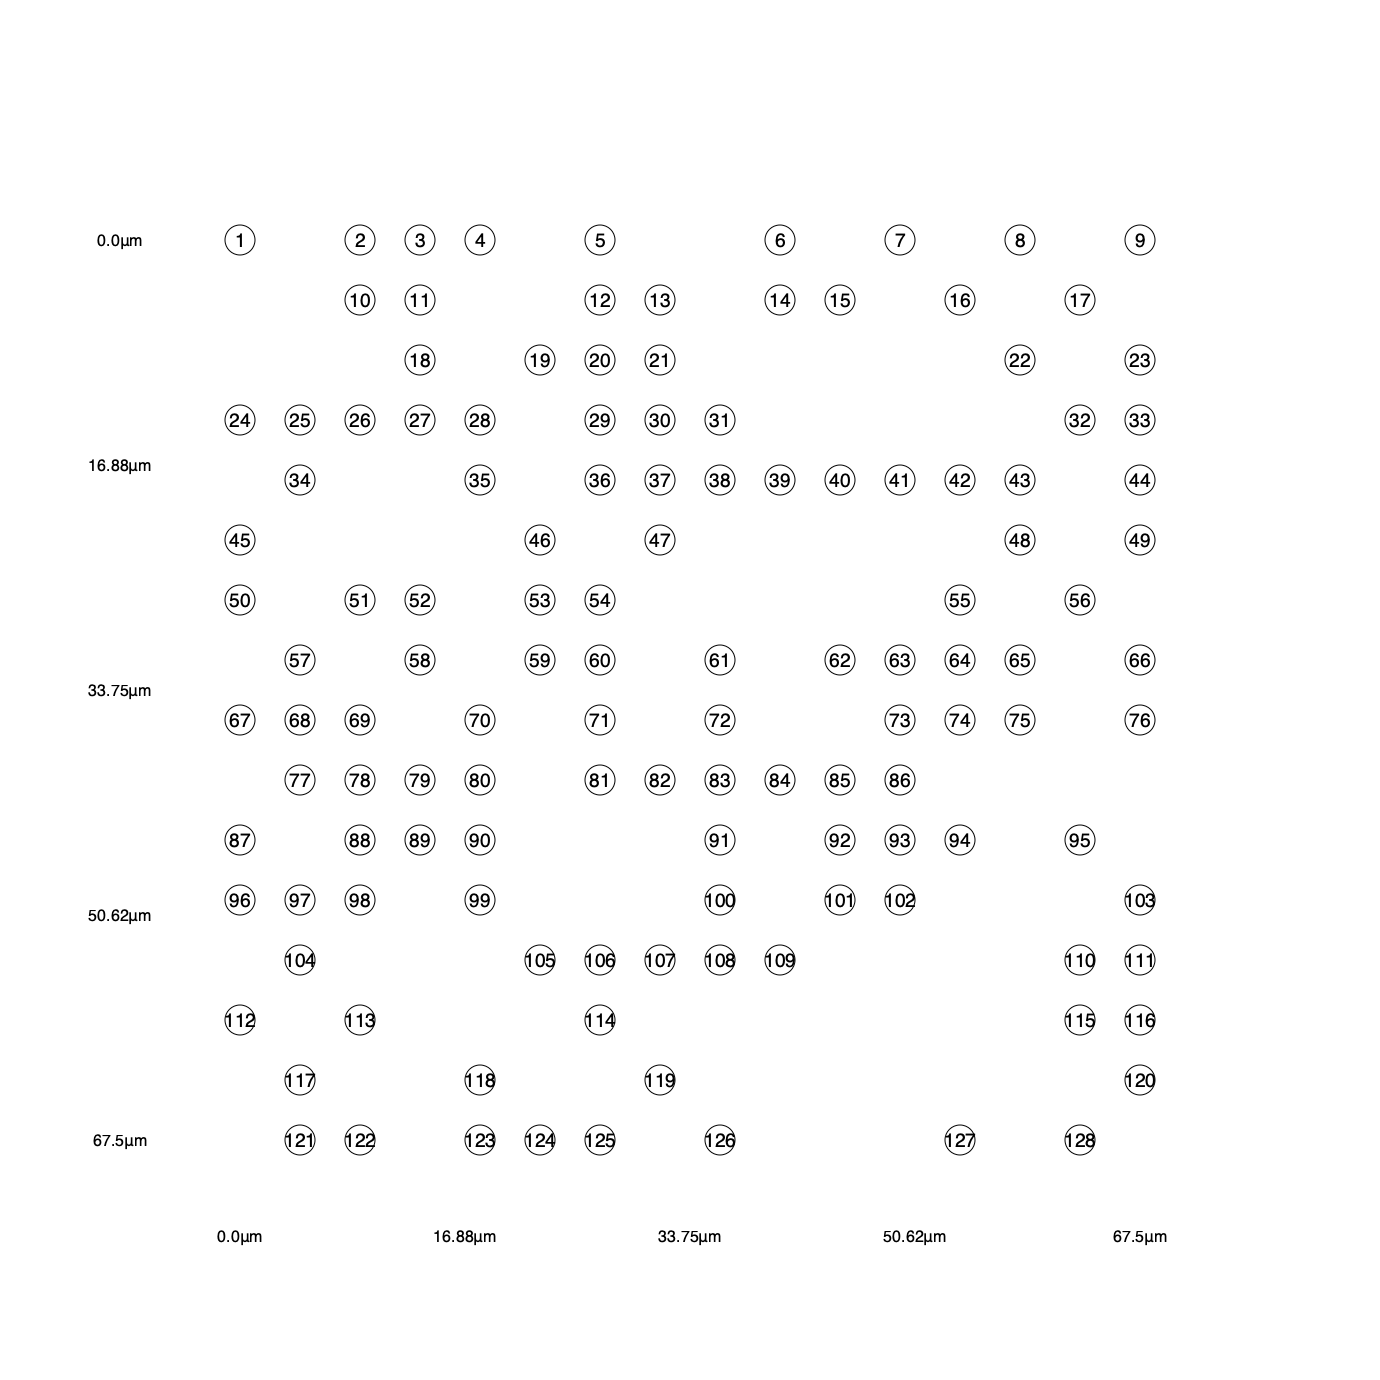

In [22]:
atoms = generate_sites(SquareLattice(), 16,16; scale = a) |> random_dropout(0.5)

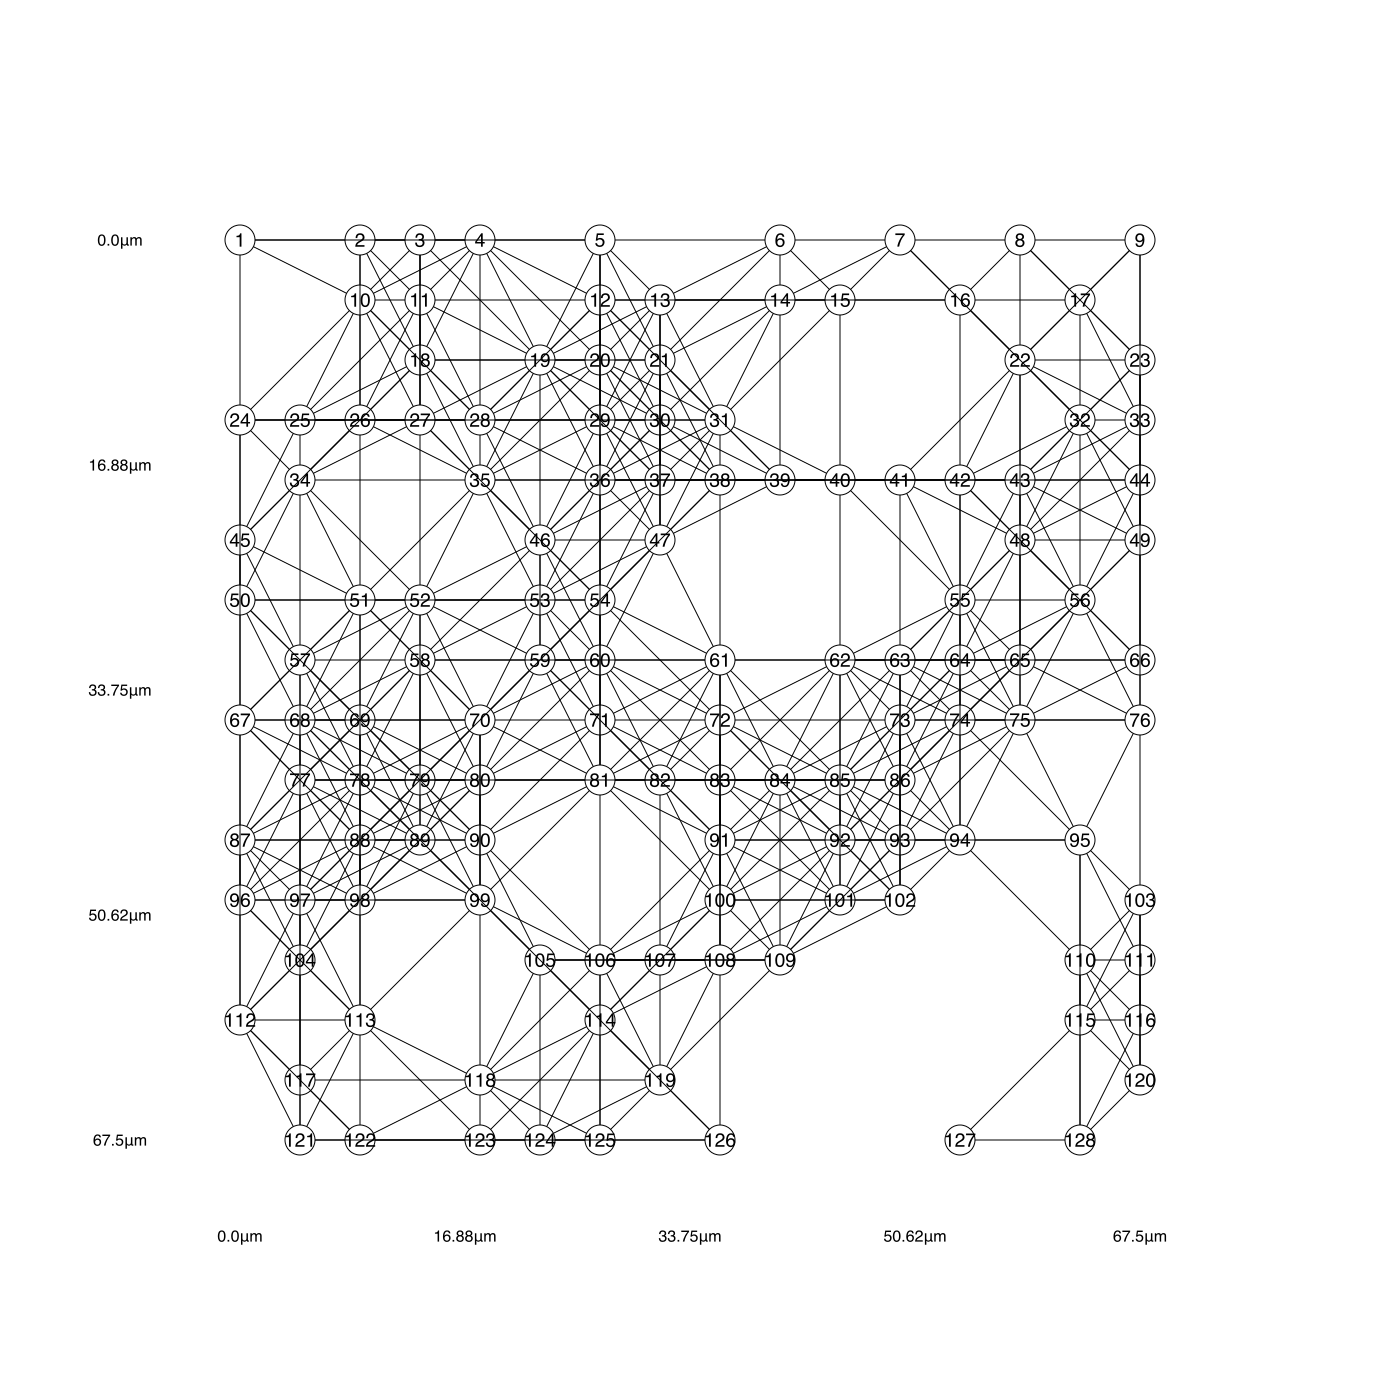

In [23]:
Bloqade.plot(atoms, blockade_radius = Rb)

In [24]:
graph = BloqadeMIS.unit_disk_graph(atoms, Rb)
print(get_hardness(graph))

25.18210970464135